In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv("Data\\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [6]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Data Cleaning


In [8]:
#Check of Missing Values
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
#We now from problem statement data is divided into two regions Bejaia Region Dataset =0  and Sidi-Bel Abbes Region Dataset=1

data.loc[:122,"Area"] = 0
data.loc[122:,"Area"] = 1

In [10]:
df = data

In [11]:
#Droping null values
df= df.dropna().reset_index(drop=True)

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Area           0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Area         244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [14]:
#Here is observed that their are some white spaces in columns names
#Let's Fix
df.columns = df.columns.str.strip()

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Area'],
      dtype='object')

In [16]:
#Delete 122 column

df=df.drop(122).reset_index(drop=True)

In [17]:
#Since Area is float64 would consume more space convert it into int64
#'day', 'month', 'year', 'Temperature', ' RH', ' Ws' these are int from dataset observation
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Area']]= df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Area']].astype(int)

In [18]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Area
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [19]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Area
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Area'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Area         243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [22]:
#These features are ranges so make as float
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [23]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Area
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [24]:
#save clean dataset
df.to_csv("Data//Algerian_forest_fires_dataset_cleaned.csv",index=0)

In [28]:
df1 = pd.read_csv("Data\\Algerian_forest_fires_dataset_cleaned.csv")

In [29]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Area
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [30]:
df1["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [31]:
#let's Now convert classes which catagorical feature into numberical using numpy where funtion
df1["Classes"] =np.where(df1["Classes"].str.contains("not fire"),0,1)

In [32]:
df1["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [33]:
df1=df1.drop(['day','month','year'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

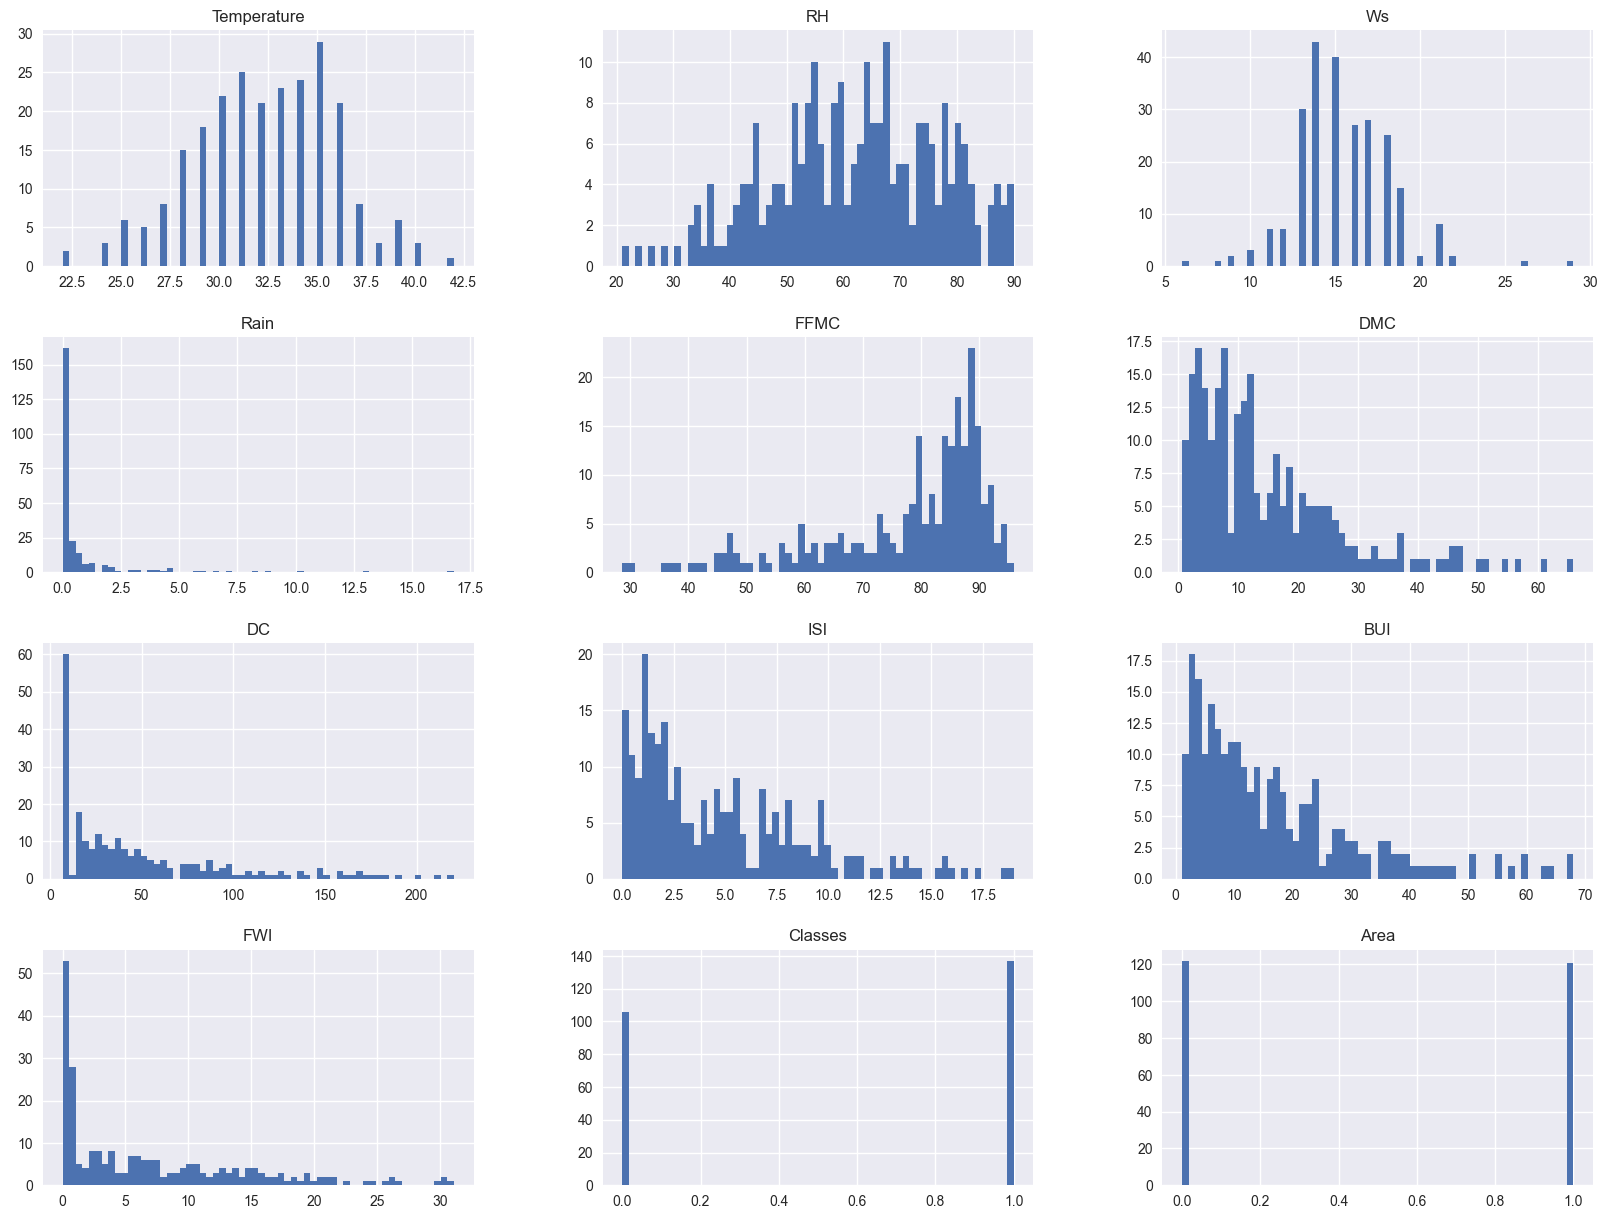

In [34]:
#Density plot
plt.style.use("seaborn-v0_8")
df1.hist(bins=60,figsize=(20,15))
plt.show

In [35]:
piepercent = df1["Classes"].value_counts(normalize=True)*100

In [36]:
piepercent

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

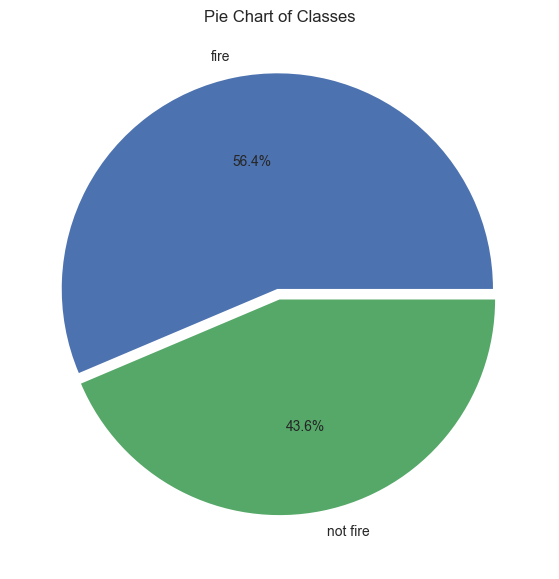

In [37]:
labels =["fire","not fire"]
plt.figure(figsize=(12,7))
plt.pie(piepercent,labels =labels,autopct="%1.1f%%",explode=(0.05,0))
plt.title("Pie Chart of Classes")
plt.show()

In [38]:
#correlation
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Area
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

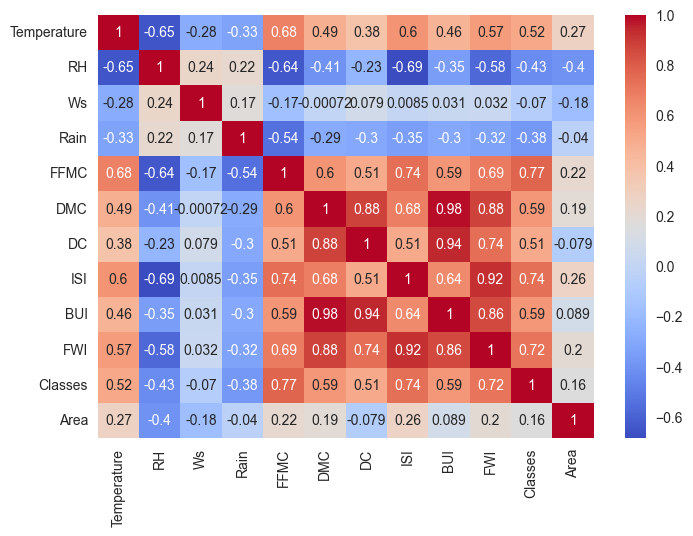

In [40]:

sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")


<Axes: xlabel='FWI'>

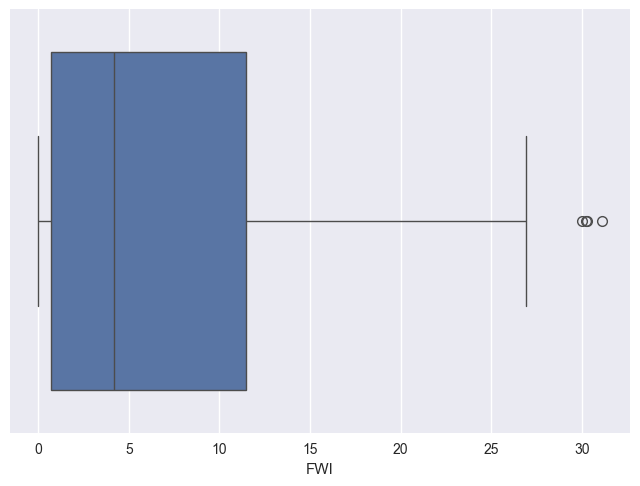

In [41]:
#box plot

sns.boxplot(x='FWI',data=df1)

<Axes: xlabel='month', ylabel='count'>

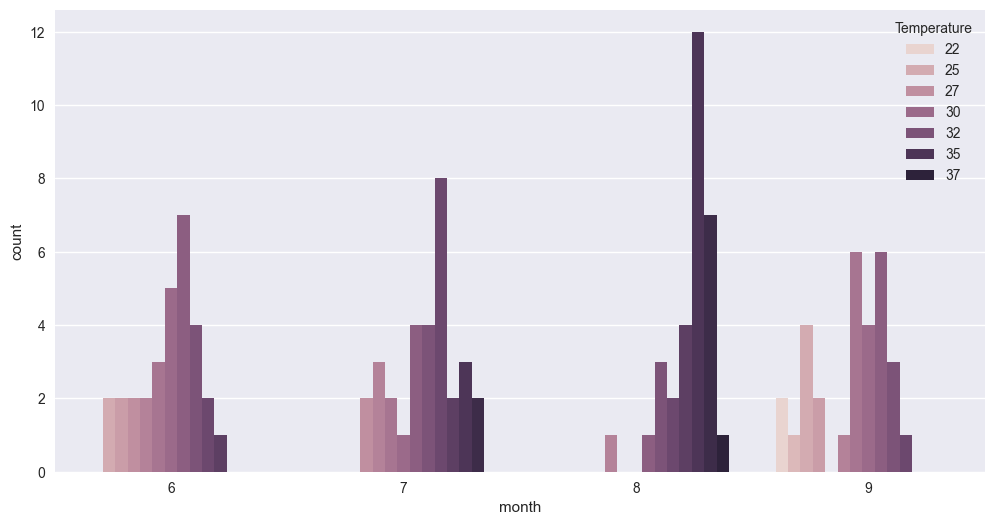

In [42]:
#Monthly Rain Analysis with respect to months in diffrent areas
#Bejaia Region Dataset =0  and Sidi-Bel Abbes Region Dataset=1

df_rain =df.loc[df["Area"]==0]
plt.subplots(figsize=(12,6))
sns.countplot(x="month",hue="Temperature",data=df_rain)

<Axes: xlabel='month', ylabel='count'>

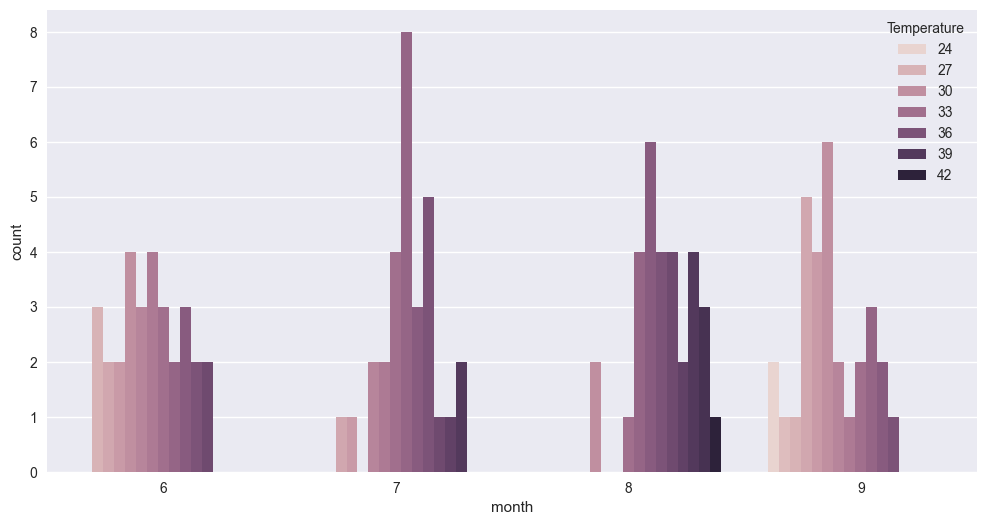

In [43]:
#Monthly Rain Analysis with respect to months in diffrent areas
#Sidi-Bel Abbes Region Dataset=1

df_rain =df.loc[df["Area"]==1]
plt.subplots(figsize=(12,6))
sns.countplot(x="month",hue="Temperature",data=df_rain)

Model Training


In [44]:
df=df1

In [45]:
x =df.drop("FWI",axis=1)
y=df["FWI"]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0,)

<Axes: >

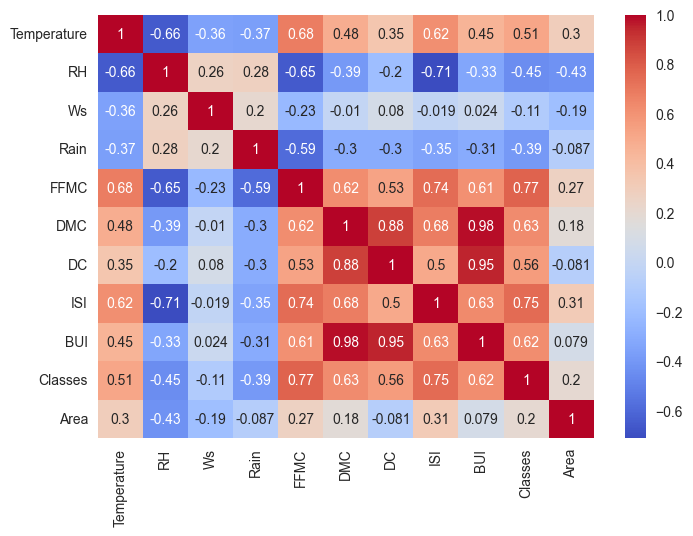

In [48]:
#Check any correlation in between test and train data
corr_X=X_train.corr()
sns.heatmap(corr_X,annot= True,cmap="coolwarm")

In [49]:

#if their are highly positively correlation it as less impact on output y so if coorection is more than 90 percent remove that columns

def correl(data,thres):
  corr_set = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>thres:
        colname = corr_matrix.columns[i]
        corr_set.add(colname)
  return corr_set

In [50]:
extra_features= correl(X_train,0.8)

In [51]:
X_train.drop(extra_features,axis=1,inplace=True)
X_test.drop(extra_features,axis=1,inplace=True)

<Axes: >

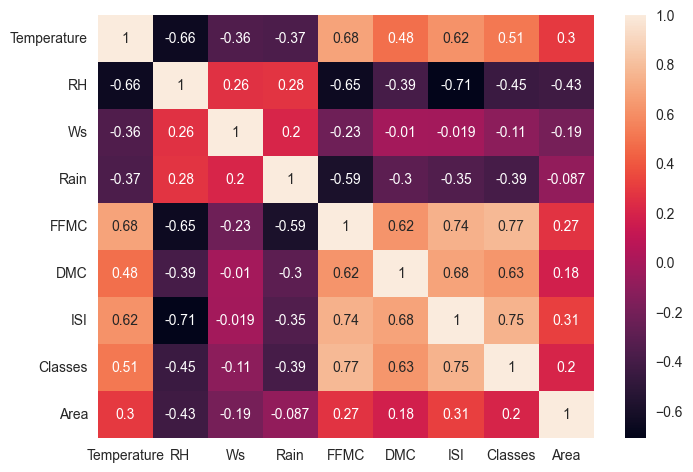

In [52]:
corr = X_train.corr()
sns.heatmap(corr,annot=True)

Data Standardization

In [53]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [54]:
X_train_scale

array([[ 1.01365171, -1.8394432 , -0.88892151, ...,  0.89709937,
         0.88561489,  1.02222494],
       [ 0.47735924,  0.64088224, -0.54024971, ..., -0.91779112,
        -1.12915898,  1.02222494],
       [ 1.81809043, -1.8394432 ,  0.50576569, ...,  2.75736213,
         0.88561489,  1.02222494],
       ...,
       [-0.32707948, -0.46873704, -1.58626511, ..., -0.57749915,
        -1.12915898, -0.97825827],
       [-0.32707948,  0.44506707, -0.54024971, ..., -0.1010904 ,
         0.88561489, -0.97825827],
       [-0.05893324, -0.86036737,  0.85443749, ...,  1.84991688,
         0.88561489,  1.02222494]], shape=(182, 9))

Text(0.5, 1.0, 'After Scaling')

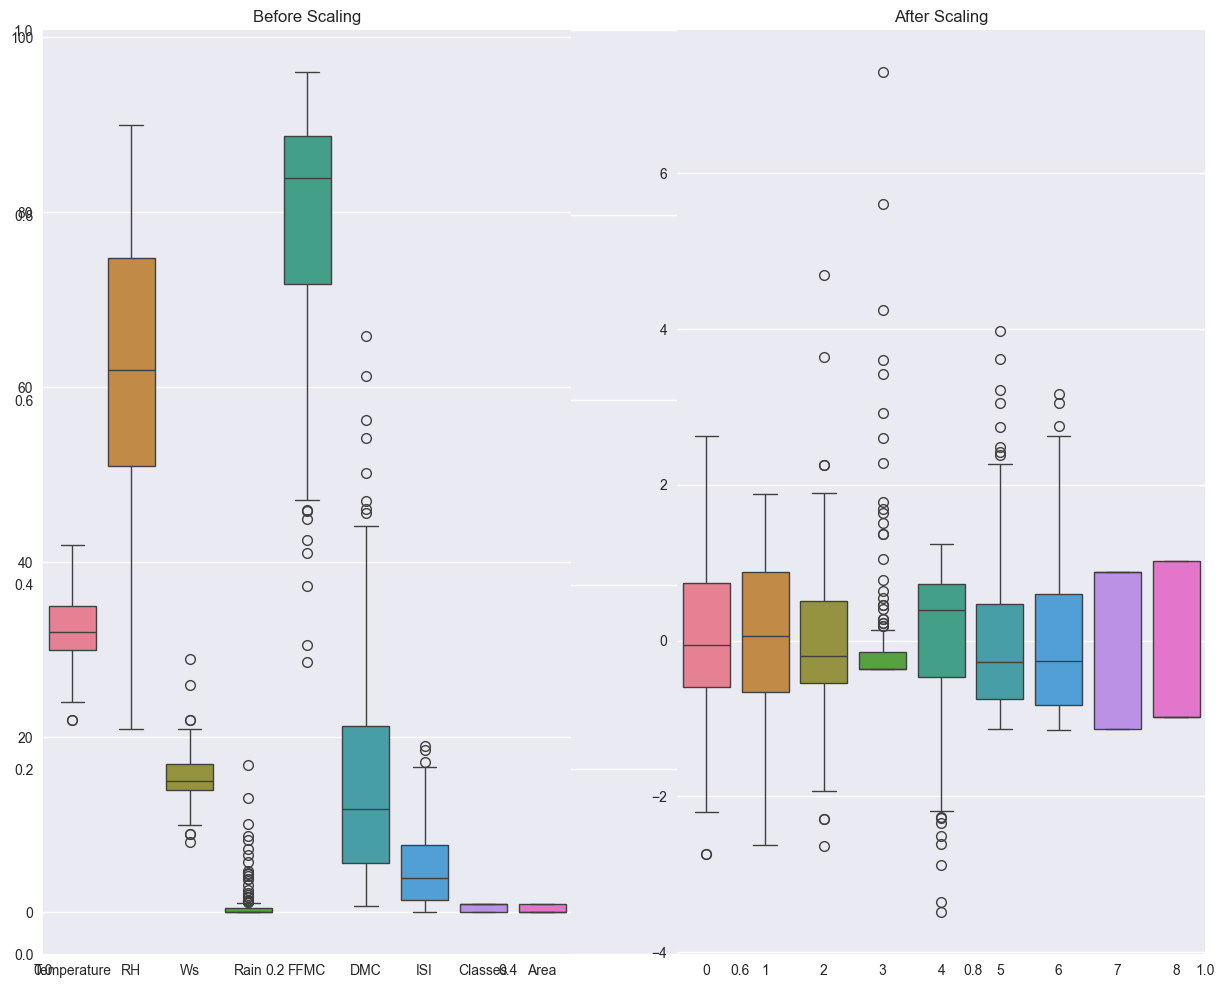

In [55]:
plt.subplots(figsize=(15,12))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scale)
plt.title("After Scaling")


Model Fitting

MSE: 1.0276388653779163
R2 Score: 0.9703973266545679


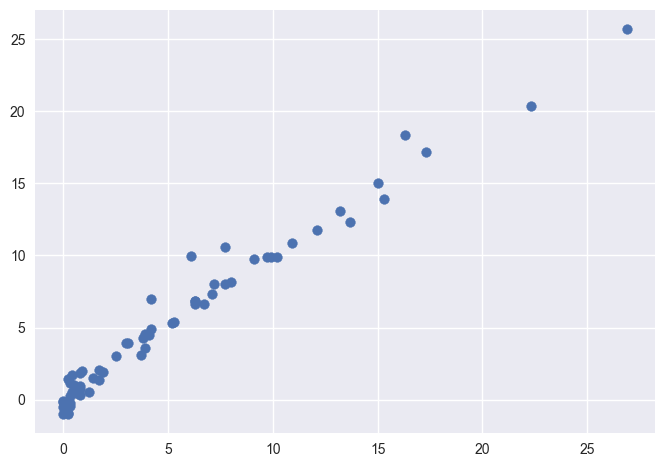

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lr = LinearRegression()
lr.fit(X_train_scale,Y_train)
y_pred = lr.predict(X_test_scale)
print("MSE:",mean_squared_error(Y_test,y_pred))
print("R2 Score:",r2_score(Y_test,y_pred))
plt.scatter(Y_test,y_pred)

MSE: 2.164064960096106
R2 Score: 0.9376608745831527


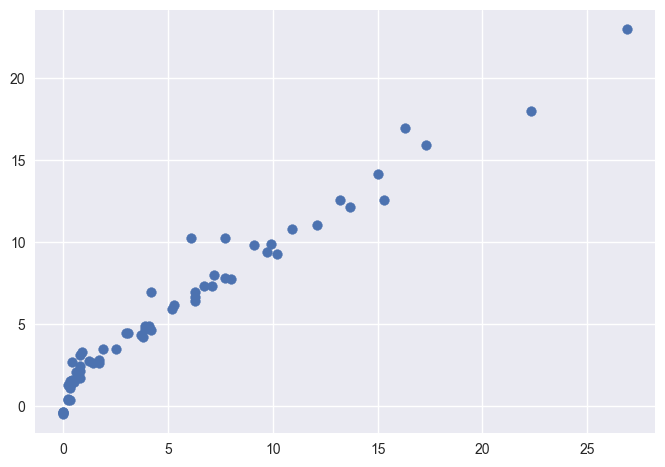

In [57]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

l = Lasso()
l.fit(X_train_scale,Y_train)
y_pred = l.predict(X_test_scale)
print("MSE:",mean_squared_error(Y_test,y_pred))
print("R2 Score:",r2_score(Y_test,y_pred))
plt.scatter(Y_test,y_pred)

MSE: 1.0690262143940819
R2 Score: 0.9692051022118806


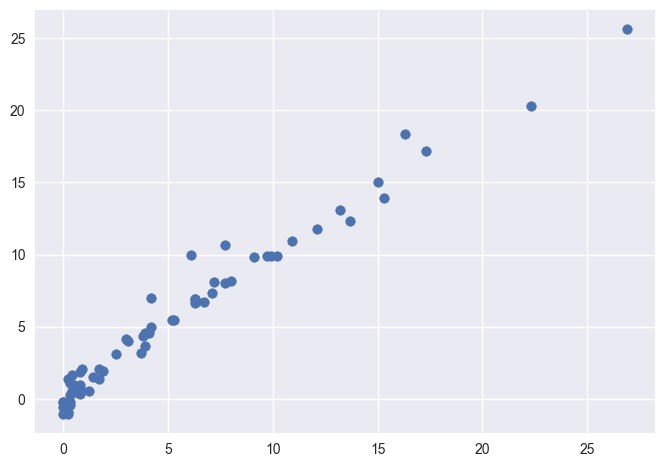

In [58]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score

r = Ridge()
r.fit(X_train_scale,Y_train)
y_pred = r.predict(X_test_scale)
print("MSE:",mean_squared_error(Y_test,y_pred))
print("R2 Score:",r2_score(Y_test,y_pred))
plt.scatter(Y_test,y_pred)

MSE: 4.944985881534331
R2 Score: 0.8575522912954434


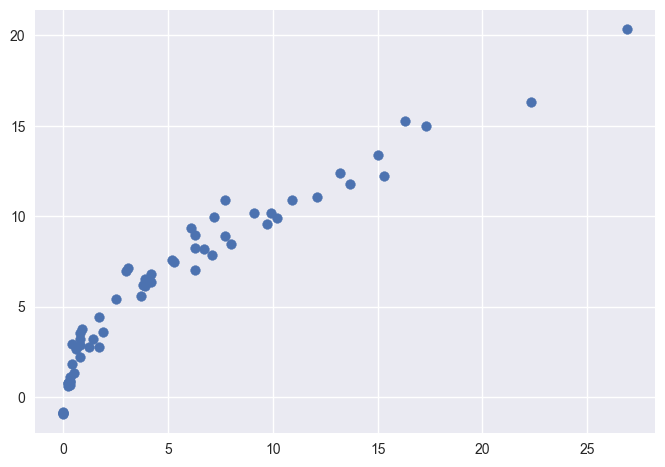

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score

en = ElasticNet()
en.fit(X_train_scale,Y_train)
y_pred = en.predict(X_test_scale)
print("MSE:",mean_squared_error(Y_test,y_pred))
print("R2 Score:",r2_score(Y_test,y_pred))
plt.scatter(Y_test,y_pred)